In [ ]:
'''
'''We are using the MS Cats and Dog images training data
# https://www.microsoft.com/en-us/download/details.aspx?id=54765
# Images are saved to:
# PetImages/Cat
# PetImages/Dog
# Data is being read in, converted to grey scale, and resized to 50x50 pixels
# The labels are "one-hot" vectors.
# np.eye(2)[0] => [0, 1] = dog
# np.eye(2)[1] => [1, 0] = cat

# The images are seperated into Test and Train sets and saved as
# numpy files for easy loading.

In [2]:
import os
import cv2
import numpy as np
from numpy.random import random
from tqdm import tqdm

REBUILD_DATA = True

class DogsVsCats():
    img_size = 50
    CATS = "PetImages\Cat"
    DOGS = "PetImages\Dog"
    labels = {CATS: [1,0], 
              DOGS: [0,1]}
    testing_percent = 0.1
    datasets = {"train": [], "test": []}
    catcount = {"train": 0, "test": 0}
    dogcount = {"train": 0, "test": 0}
    
    def make_training_data(self):
        for label in self.labels:
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)

                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.img_size, self.img_size))
                    # choose the dataset to assign the image (test or train)
                    dataset = "test" if random() <= self.testing_percent  else "train"
                    self.datasets[dataset].append([np.array(img), self.labels[label]])          
                    # keep track of how many cats and dogs 
                    # to make sure we have balanced training data
                    if label == self.CATS:
                        self.catcount[dataset] += 1
                    elif label == self.DOGS:
                        self.dogcount[dataset] += 1
                except Exception as e:
                    # some of the images are known to be corrupt
                    pass
    
        for dataset in self.datasets:
            np.random.shuffle(self.datasets[dataset])
            np.save(dataset + "_data.npy", self.datasets[dataset])

        print("Cats:", self.catcount)
        print("Cat %:", round(self.catcount["test"] / sum(self.catcount.values()) * 100, 2))
        print("Dogs:", self.dogcount)
        print("Dog %:", round(self.dogcount["test"] / sum(self.dogcount.values()) * 100, 2))
    
if REBUILD_DATA:
    dogsvcats = DogsVsCats()
    dogsvcats.make_training_data()

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:14<00:00, 888.00it/s]

Cats: {'train': 11218, 'test': 1258}
Cat %: 10.08
Dogs: {'train': 11155, 'test': 1315}
Dog %: 10.55


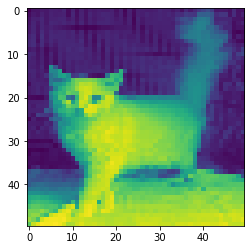

In [4]:
# Example image fed into the model
%matplotlib inline
import matplotlib.pyplot as plt

img = DogsVsCats.datasets["train"][0][0]
plt.imshow(img, cma)